In [5]:
%pylab inline
pylab.rcParams['figure.figsize'] = (14,14)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

location = '/home/jakob/Project_MayaSim/Python/output_data/X9_stability_analysis/results/all_trajectories.pkl'
all_data = pd.read_pickle(location)

Populating the interactive namespace from numpy and matplotlib


EOFError: 

(0, 0, 9000)


KeyError: (0, 0, 9000)

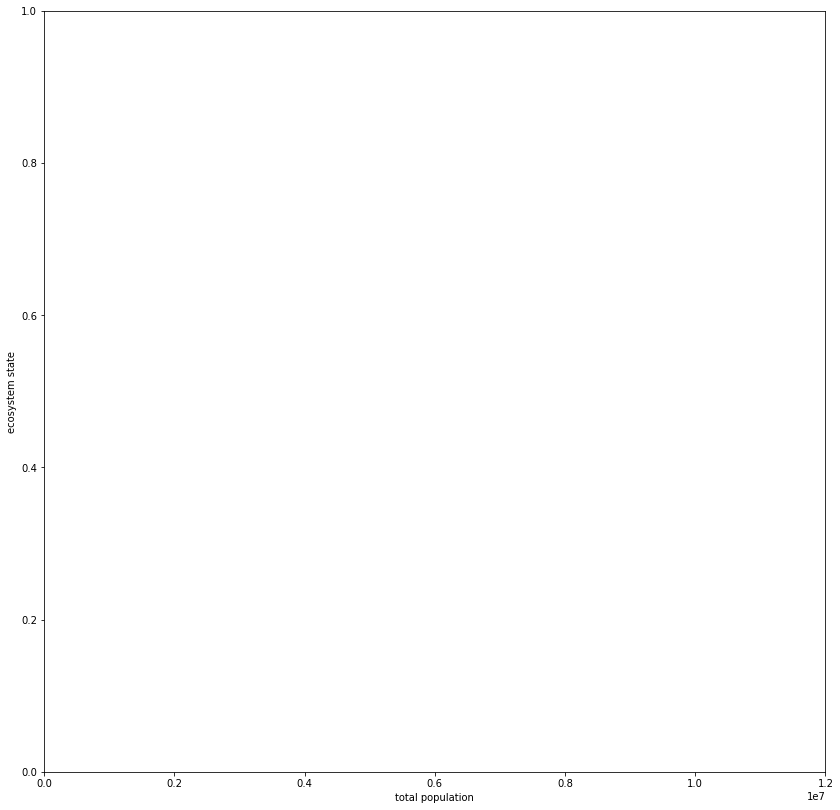

In [97]:
pylab.rcParams['figure.figsize'] = (14,14)

index_names = all_data.index.names
all_data.columns = range(len(all_data.columns))

d_lengths = all_data.index.levels[0]
d_severities = all_data.index.levels[1]
r_trades = all_data.index.levels[2]

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('total population')
ax.set_ylabel('ecosystem state')
ax.set_xlim([0, 1.2 * 1e7])
#ax.set_xscale('log')

r_trade = 9000
d_length = 0
d_severity = 0
index_value = (d_length, d_severity, r_trade)
print(index_value)
for run in range(20):
    tmp = all_data.loc[index_value, run]
    d_length = index_value[0]
    d_start = 200
    d_end = d_start + d_length
    d_severity = index_value[1]
    alpha = 0 if not d_severity != 0 else float(d_severity*d_length)/10000.

    population = tmp['total_population']
    ecosystem = tmp['forest_state_3_cells']

    ax.plot(population[0:d_start+1], 
            ecosystem[0:d_start+1],
            color='grey', alpha=0.1)

    ax.plot(population[d_start:d_end+1], 
            ecosystem[d_start:d_end+1],
            color='red', alpha=0.1)

    ax.plot(population[d_end:], 
            ecosystem[d_end:],
            color='green', alpha=0.1)

    if population.values[-1] != 0:
        ax.scatter(population.values[-1], 
                   ecosystem.values[-1])


